In [1]:
import pandas as pd
import numpy as np


In [2]:
try:
    df = pd.read_csv('OnlineRetail.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
df.replace('',np.nan,inplace=True)
df.replace(' ',np.nan,inplace=True)
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.shape

(541909, 8)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#Checking if customer Id exsits sometimes for InvoiceNo and sometimes doesn't
invoice_customers = df.groupby('InvoiceNo')['CustomerID'].nunique()
inconsistent_invoices = len(invoice_customers[invoice_customers > 1])
inconsistent_invoices

0

In [9]:
df.dropna(subset=["CustomerID"],inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.shape

(406829, 8)

We need to deal with these columns:
- Description     object
- InvoiceNo       object
- StockCode       object
- InvoiceDate     object
- Country         object

In [11]:
df.drop(['Description'],axis=1,inplace=True)

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df.drop(['InvoiceDate'],axis=1,inplace=True)

In [13]:
def encoder(invoice_number):
    encoded_number = []
    for character in str(invoice_number):
        if character.isalpha():
            encoded_letter = ord(character.upper()) - ord('A') + 1  # Encode letter as numeric value
            encoded_number.append(encoded_letter)
        elif character != ' ':  # Skip spaces
            encoded_number.append(int(character))
    return int(''.join(map(str, encoded_number)))

df['InvoiceNo'] = df['InvoiceNo'].apply(encoder)
df['StockCode'] = df['StockCode'].apply(encoder)
df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute
0,536365,851231,6,2.55,17850.0,United Kingdom,2010,12,1,8,26
1,536365,71053,6,3.39,17850.0,United Kingdom,2010,12,1,8,26
2,536365,844062,8,2.75,17850.0,United Kingdom,2010,12,1,8,26
3,536365,840297,6,3.39,17850.0,United Kingdom,2010,12,1,8,26
4,536365,840295,6,3.39,17850.0,United Kingdom,2010,12,1,8,26
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,0.85,12680.0,France,2011,12,9,12,50
541905,581587,22899,6,2.10,12680.0,France,2011,12,9,12,50
541906,581587,23254,4,4.15,12680.0,France,2011,12,9,12,50
541907,581587,23255,4,4.15,12680.0,France,2011,12,9,12,50


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Country' column
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

df.drop(['Country'],axis=1,inplace=True)


In [15]:
df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Year,Month,Day,Hour,Minute,Country_encoded
0,536365,851231,6,2.55,17850.0,2010,12,1,8,26,35
1,536365,71053,6,3.39,17850.0,2010,12,1,8,26,35
2,536365,844062,8,2.75,17850.0,2010,12,1,8,26,35
3,536365,840297,6,3.39,17850.0,2010,12,1,8,26,35
4,536365,840295,6,3.39,17850.0,2010,12,1,8,26,35
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,0.85,12680.0,2011,12,9,12,50,13
541905,581587,22899,6,2.10,12680.0,2011,12,9,12,50,13
541906,581587,23254,4,4.15,12680.0,2011,12,9,12,50,13
541907,581587,23255,4,4.15,12680.0,2011,12,9,12,50,13


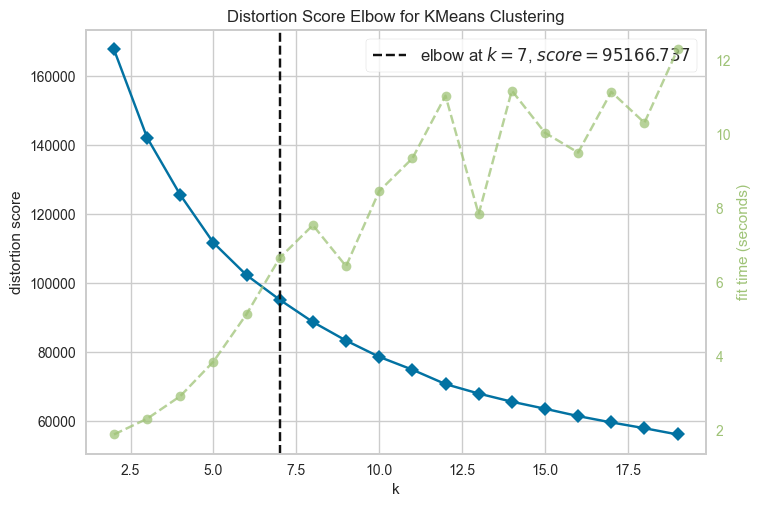

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,20))
visualizer.fit(normalized_data)        
visualizer.show()                       

In [17]:
kmeans = KMeans(n_clusters=7, random_state=42)
# Fit the model to your data
kmeans.fit(normalized_data)
# Obtain the cluster labels for the data points
cluster_labels = kmeans.labels_

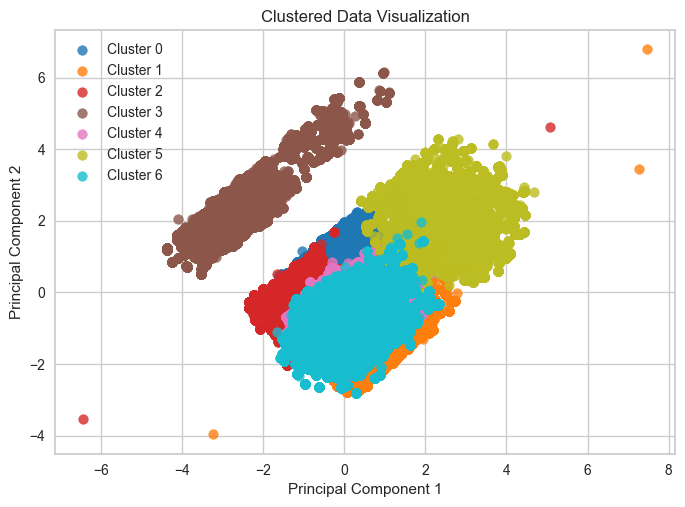

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# Apply PCA with 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(standardized_data)
# Define a colormap with 7 distinct colors
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

# Create a scatter plot for each cluster
for cluster in np.unique(cluster_labels):
    indices = np.where(cluster_labels == cluster)[0]
    plt.scatter(
        reduced_data[indices, 0],
        reduced_data[indices, 1],
        color=colors[cluster],
        label=f'Cluster {cluster}',
        alpha=0.8
    )

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()
